In [1]:
from __future__ import division

import math

import rasterio


# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
image_file = "20200611_030731_1009_3B_AnalyticMS.tif"

satdat = rasterio.open(image_file)

In [2]:
# Minimum bounding box in projected units

print(satdat.bounds)

BoundingBox(left=371937.0, bottom=149628.0, right=398841.0, top=162771.0)


In [3]:
# Get dimensions, in map units (using the example GeoTIFF, that's meters)

width_in_projected_units = satdat.bounds.right - satdat.bounds.left
height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 26904.0, Height: 13143.0


In [4]:
# Number of rows and columns.

print("Rows: {}, Columns: {}".format(satdat.height, satdat.width))

Rows: 4381, Columns: 8968


In [5]:
# This dataset's projection uses meters as distance units.  What are the dimensions of a single pixel in meters?

xres = (satdat.bounds.right - satdat.bounds.left) / satdat.width
yres = (satdat.bounds.top - satdat.bounds.bottom) / satdat.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

3.0 3.0
Are the pixels square: True


In [6]:
# Get coordinate reference system

satdat.crs

CRS({'init': 'epsg:32648'})

In [7]:
# Convert pixel coordinates to world coordinates.

# Upper left pixel
row_min = 0
col_min = 0

print("satdat_height: {}, satdat_width: {}".format(satdat.height, satdat.width)) 
# Lower right pixel.  Rows and columns are zero indexing.
row_max = satdat.height - 1
col_max = satdat.width - 1

# Transform coordinates with the dataset's affine transformation.
topleft = satdat.affine * (row_min, col_min)
botright = satdat.affine * (row_max, col_max)

print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

satdat_height: 4381, satdat_width: 8968
Top left corner coordinates: (371937.0, 162771.0)
Bottom right corner coordinates: (385077.0, 135870.0)


In [8]:
# All of the metadata required to create an image of the same dimensions, datatype, format, etc. is stored in
# one location.

print(satdat.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 8968, 'height': 4381, 'count': 4, 'crs': CRS({'init': 'epsg:32648'}), 'transform': (371937.0, 3.0, 0.0, 162771.0, 0.0, -3.0), 'affine': Affine(3.0, 0.0, 371937.0,
       0.0, -3.0, 162771.0)}


## BANDS

In [9]:
# The dataset reports a band count.
print(satdat.count)

# And provides a sequence of band indexes.  These are one indexing, not zero indexing like Numpy arrays.
print(satdat.indexes)

4
(1, 2, 3, 4)


In [10]:
b1, b2, b3, b4  = satdat.read()

In [11]:
# Bands are stored as Numpy arrays.

print(type(b1))

<class 'numpy.ndarray'>


In [12]:
# How many dimensions would a single raster band have?  Two dimensions: rows and columns.

print(b1.ndim)

2


In [13]:
# Glimpse at the band's values and datatype.

print(b4)
print(b4.dtype)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
uint16


In [14]:
# Output a min & max pixel value in each band.

for bidx in satdat.indexes:
    data = satdat.read(bidx)
    print("Band {bidx} min {min} max {max}".format(bidx=bidx, min=data.min(), max=data.max()))


# And an overall min/max for the entire dataset.
    
data = satdat.read()
print("Overall min/max: {} {}".format(data.min(), data.max()))

Band 1 min 0 max 42452
Band 2 min 0 max 28873
Band 3 min 0 max 37518
Band 4 min 0 max 29103
Overall min/max: 0 42452


In [15]:
# Let's grab the pixel 2km east and 2km south of the upper left corner

# World coordinates for the desired pixel.
x_coord = satdat.bounds.left - 2000
y_coord = satdat.bounds.top + 2000

# Convert world coordinates to pixel.  World coordinates may not transform precisely to row and column indexes,
# but a Numpy array can only be indexed by integer values.  The 'op' parameter for 'satdat.index()' determines
# how the transformed values are rounded.  In some cases any point falling within a pixel should be considered
# contained, and in other cases only points falling within one portion of the pixels hould be considered contained.
# The 'op' parameter lets users make this decision on their own.  The values must still be cast to integers.
col, row = satdat.index(x_coord, y_coord, op=math.floor)
col = int(col)
row = int(row)


# Now let's look at the value of each band at this pixel
print("b1: {}".format(b1[row, col]))
print("b2: {}".format(b2[row, col]))
print("b3: {}".format(b3[row, col]))
print("b4: {}".format(b4[row, col]))


b1: 7933
b2: 7581
b3: 5331
b4: 2257


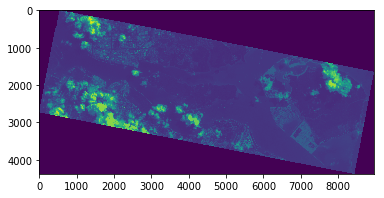

In [26]:
from matplotlib import pyplot as plt
# Use imshow to load the band.
fig = plt.imshow(b1)

# Display the results.
plt.show()

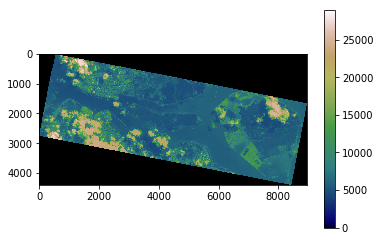

In [17]:
# Use imshow to load the band.
fig = plt.imshow(b2)
fig.set_cmap('gist_earth')
plt.colorbar()
# Display the results.
plt.show()

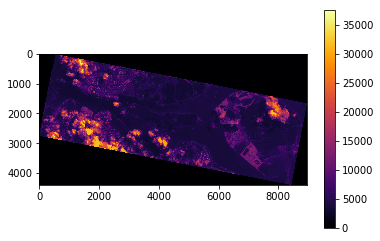

In [18]:
fig = plt.imshow(b3)

fig.set_cmap('inferno')
plt.colorbar()
# Display the results.
plt.show()

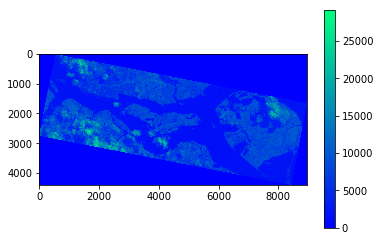

In [19]:
fig = plt.imshow(b4)

fig.set_cmap('winter')
plt.colorbar()
# Display the results.
plt.show()

In [12]:
from __future__ import division

import math

import rasterio

# Extract the Visible Red and NIR bands #PSS 4 band 
image_file = "20200611_030731_1009_3B_AnalyticMS.tif"

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(image_file) as src:
    band_red = src.read(3)

with rasterio.open(image_file) as src:
    band_nir = src.read(4)

# Normalize to Top of Atmosphere Reflectance NDVI - Vegitation Index

Converting the pixel values to TOA Reflectance makes the analysis more accurate, and comparable with other scenes. Load the TOA Reflectance coefficients from the metadata XML asset.

In [13]:
from xml.dom import minidom

xmldoc = minidom.parse("20200611_030731_1009_3B_AnalyticMS_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)

In [14]:
#Multiply the band values by the TOA Reflectance coefficients.

# Multiply by corresponding coefficients
band_red = band_red * coeffs[3]
band_nir = band_nir * coeffs[4]

In [15]:
# Perform the NDVI calculation
## Next we perform the NDVI calculation through subtraction and division of the pixel values.
import numpy 

# Allow division by zero
numpy.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi1 = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [16]:
# Save the NDVI image
## Finally we output these new pixel values to a new image file, making sure we mirror the GeoTIFF spatial metadata:

# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ndvi_20200611_030731_1009_3B_AnalyticMS.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi1.astype(rasterio.float32))

C:\ProgramData\Anaconda3\lib\site-packages\rasterio\__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [17]:
# ndvi_image = 'ndvi_20200611_030731_1009_3B_AnalyticMS.tif'
# ndvidat = rasterio.open(ndvi_image)
# print(ndvidat.indexes)
# data  = ndvidat.read()
# #fig = plt.imshow(ndvidat)
#plt.imshow('ndvi_20200611_030731_1009_3B_AnalyticMS.tif')
plt.show

<function matplotlib.pyplot.show>

In [18]:
plt.imsave("ndvi_20200611_030731_1009_3B_AnalyticMS_cmap.png", ndvi1, cmap=plt.cm.summer)

In [40]:
plt.show("ndvi_20200611_030731_1009_3B_AnalyticMS_cmap.png",ndvi1)
plt.show()


In [5]:
from __future__ import division

import math

import rasterio

# Extract the Visible Red and NIR bands #PSS 4 band 
image_file = "20200505_030850_101b_3B_AnalyticMS.tif"

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(image_file) as src:
    band_red = src.read(3)

with rasterio.open(image_file) as src:
    band_nir = src.read(4)

In [6]:
from xml.dom import minidom

xmldoc = minidom.parse("20200505_030850_101b_3B_AnalyticMS_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)

In [7]:
#Multiply the band values by the TOA Reflectance coefficients.

# Multiply by corresponding coefficients
band_red = band_red * coeffs[3]
band_nir = band_nir * coeffs[4]

In [8]:
# Perform the NDVI calculation
## Next we perform the NDVI calculation through subtraction and division of the pixel values.
import numpy 

# Allow division by zero
numpy.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [9]:
# Save the NDVI image
## Finally we output these new pixel values to a new image file, making sure we mirror the GeoTIFF spatial metadata:

# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ndvi_20200505_030850_101b_3B_AnalyticMS.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))

C:\ProgramData\Anaconda3\lib\site-packages\rasterio\__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [11]:
from matplotlib import pyplot as plt
plt.imsave("ndvi_20200505_030850_101b_3B_AnalyticMS_cmap.png", ndvi, cmap=plt.cm.summer)
plt.show()

In [19]:
date1 = 20200611
date  = 20200505

ValueError: operands could not be broadcast together with shapes (4381,8968) (4301,8807) 

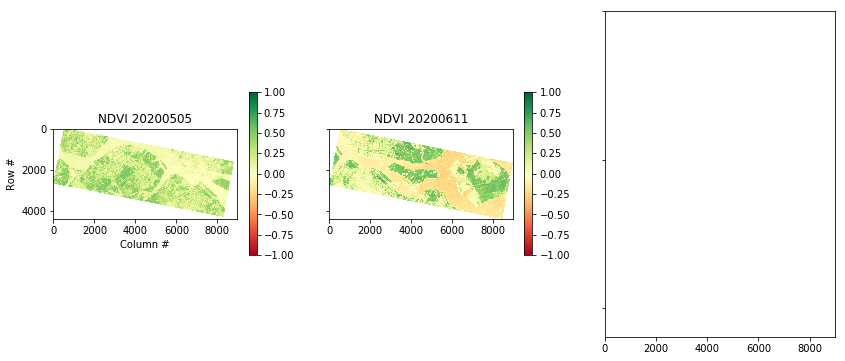

In [21]:
fig, axes = plt.subplots(1,3, figsize=(14,6), sharex=True, sharey=True)

plt.sca(axes[0])
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.sca(axes[1])
plt.imshow(ndvi1, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('NDVI {}'.format(date1))

plt.sca(axes[2])
plt.imshow(ndvi1 - ndvi, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Diff ({} - {})'.format(date2, date))

In [ ]:
# import rasterio
# from rasterio.enums import Resampling

# # Register GDAL format drivers and configuration options with a
# # context manager.
# with rasterio.Env():

#     with rasterio.open('/path/to/input.tif') as dataset:
#         data = dataset.read(1, out_shape=(1200, 1200), resampling=Resampling.bilinear)
#         # scale image transform
#         transform = dataset.transform * dataset.transform.scale(
#             (dataset.height / data.shape[0]),  # rows
#             (dataset.width / data.shape[1])  # cols
#         )

#         profile = dataset.profile
#         profile.update(transform=transform, width=data.shape[1], height=data.shape[0])

#     with rasterio.open('/path/to/output.tif', 'w', **profile) as dataset:
#         dataset.write(data, 1)